# Selections counter

This Notebook imports all files in [Data](../Data) and plots how many right or wrong selections were done in an experiment.

In [7]:
# Import modules
import sys
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import custom 
sys.path.append("..") # Adds higher directory to python modules path.
from Functions import data_tools
from Functions import unity_analysis

## Import data

Import the data files contained in the [subjects](/subjects.json) file

In [2]:
# Settings
n_subjects = 2  # Number of subjects to analyze, must match JSON file

# Preallocate variables
unity_stream = [None] * n_subjects

# Import data
file = open("..\subjects.json")
json_data = json.load(file)

p300_trials = json_data["p300"]
ssvep_trial = json_data["ssvep"]
p300_trials.keys()

for i, (key, value) in enumerate(p300_trials.items()):
    [_,_,unity_stream[i]] = data_tools.import_data(f"..\\Data\\{key}\\eeg\\{value}")

Creating RawArray with float64 data, n_channels=7, n_times=609140
    Range : 0 ... 609139 =      0.000 ...  2030.463 secs
Ready.
Creating RawArray with float64 data, n_channels=23, n_times=320255
    Range : 0 ... 320254 =      0.000 ...  1067.513 secs
Ready.


## Total values

Compute the number of `[correct, incorrect]` selections found in each stream

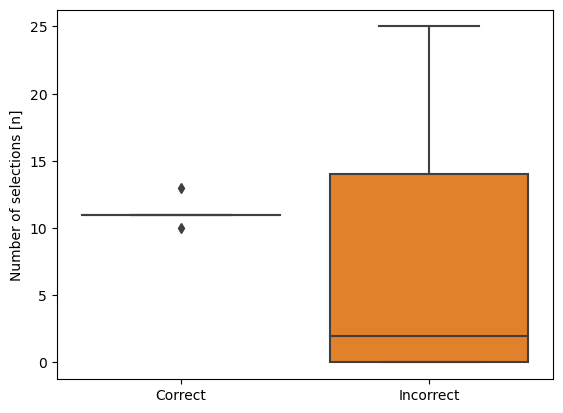

In [10]:
# Settings
plot_bar = True

total_list = unity_analysis.total_metrics(unity_stream)   # List of subjects
total_np = np.concatenate(total_list,axis=0)

if plot_bar:
    fig, ax = plt.subplots()
    ax = sns.boxplot(total_np)
    # ax = sns.violinplot(total_np)
    ax.set_xticks([0,1], ["Correct", "Incorrect"])
    ax.set_ylabel('Number of selections [n]')
    

In [ ]:
my_list = []
print(my_list)
my_list.append([1,2])
print(my_list)
my_list.append([2,3])
print(my_list)
np_list = np.array(my_list)
print(np_list)

In [ ]:
a = unity_stream[0]
b = unity_stream[1]

In [ ]:
str_events = [event.split(',')[0] for event in unity_stream[0]["Event"].tolist()]

experiment_start = [1 if "Starting Experiment" in event else 0 for event in str_events]
start_index = len(experiment_start) - experiment_start[::-1].index(1)

n_pipelines = np.sum([1 if (event==1) and (experiment_start[i+1]) else 0 for (i,event) in enumerate(experiment_start)])
# n_pipelines += [1 if (event==1) and (experiment_start[i+1]) else 0 for (i,event) in enumerate(experiment_start)]
# total_selections = np.zeros(2)
# total_selections[0] += [1 if "41" in event else 0 for event in str_events[start_index:]][0]

# for event in str_events[start_index:]:
#     if "41" in event: total_selections[0] += 1
#     elif "42" in event: total_selections[1] += 1

 

In [ ]:
type(c[0])